In [90]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cmap

In [91]:
def slices(array, n):
    data = []
    for i in range(0,100,n):
        slice = array[:,:, i:i+n].sum(axis=2)//n
        data.append(slice)
    return data


In [97]:
def getFileNames(fileCount):
    data = []
    for i in range(0, fileCount):
        name = "Data\\TCf0" + str(i+1)+ ".bin";
        data.append(name)
    return data

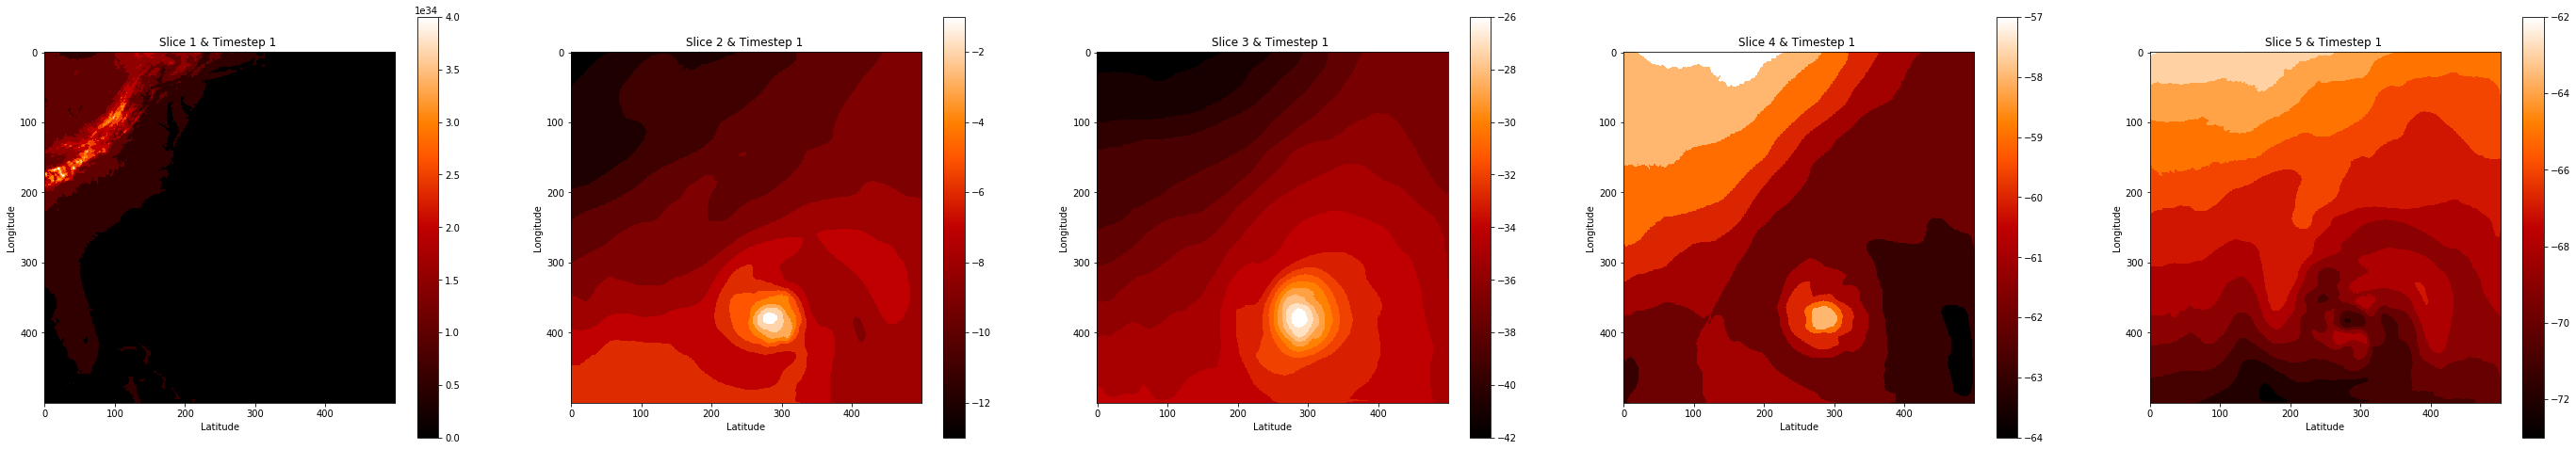

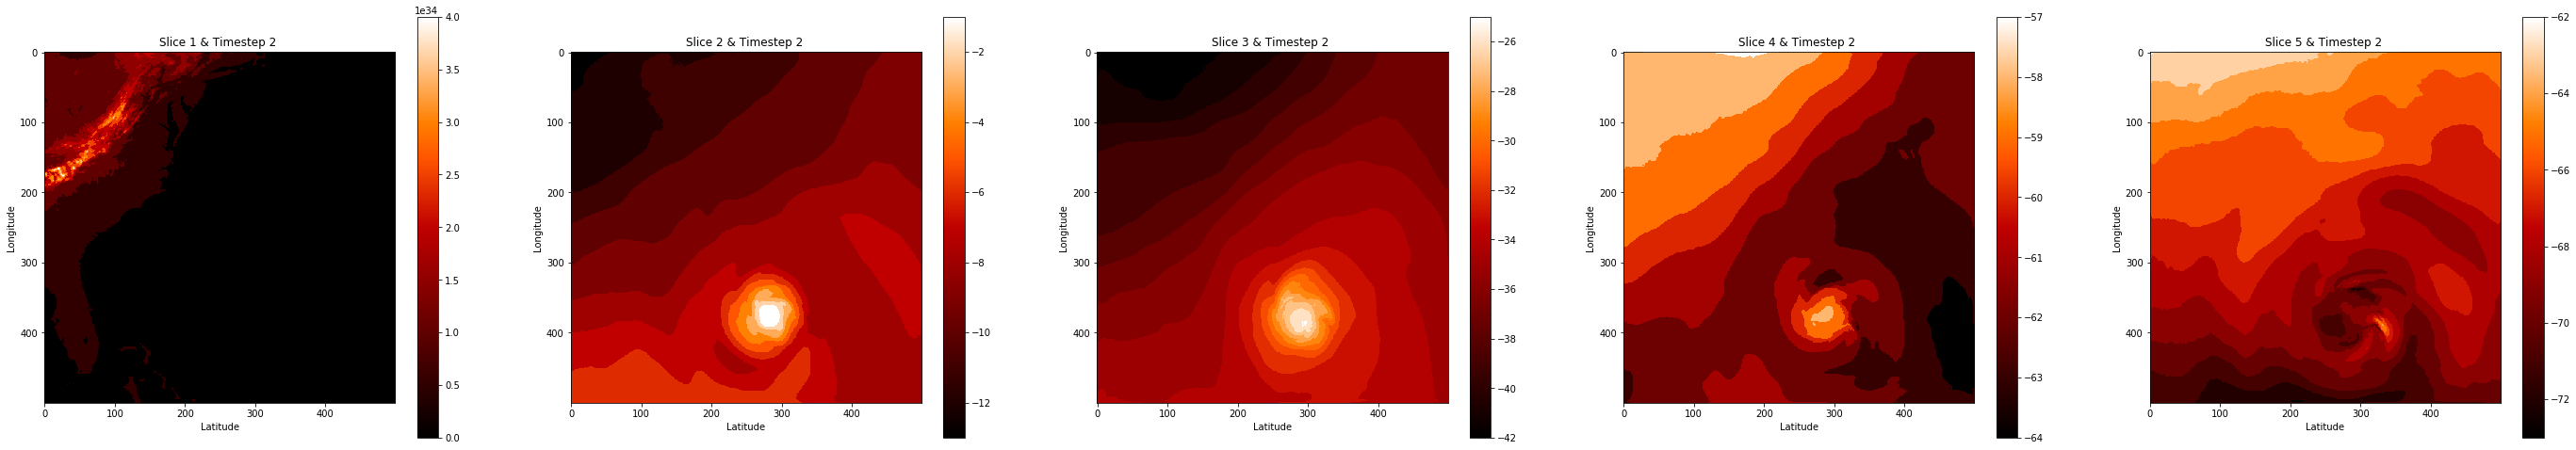

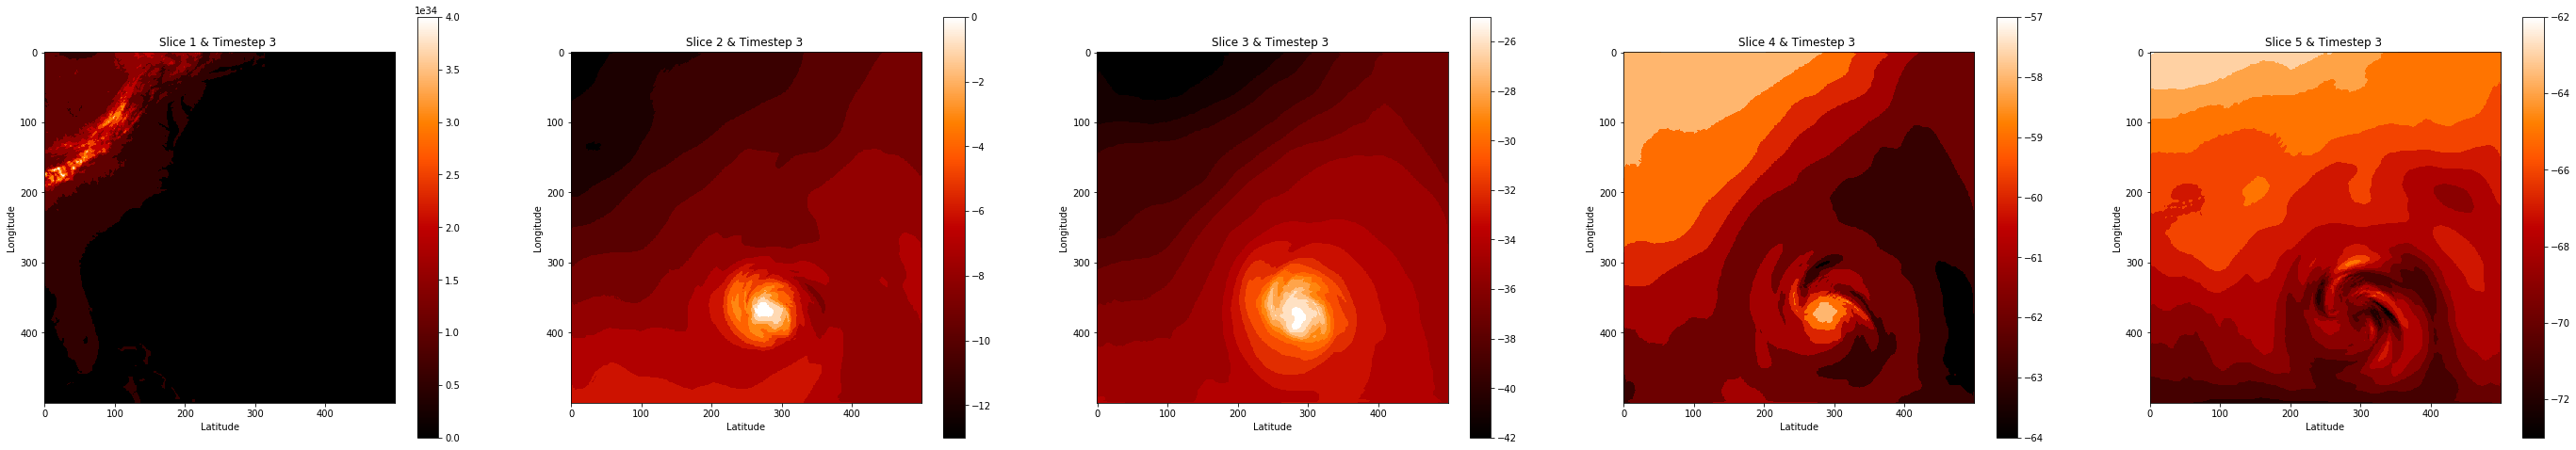

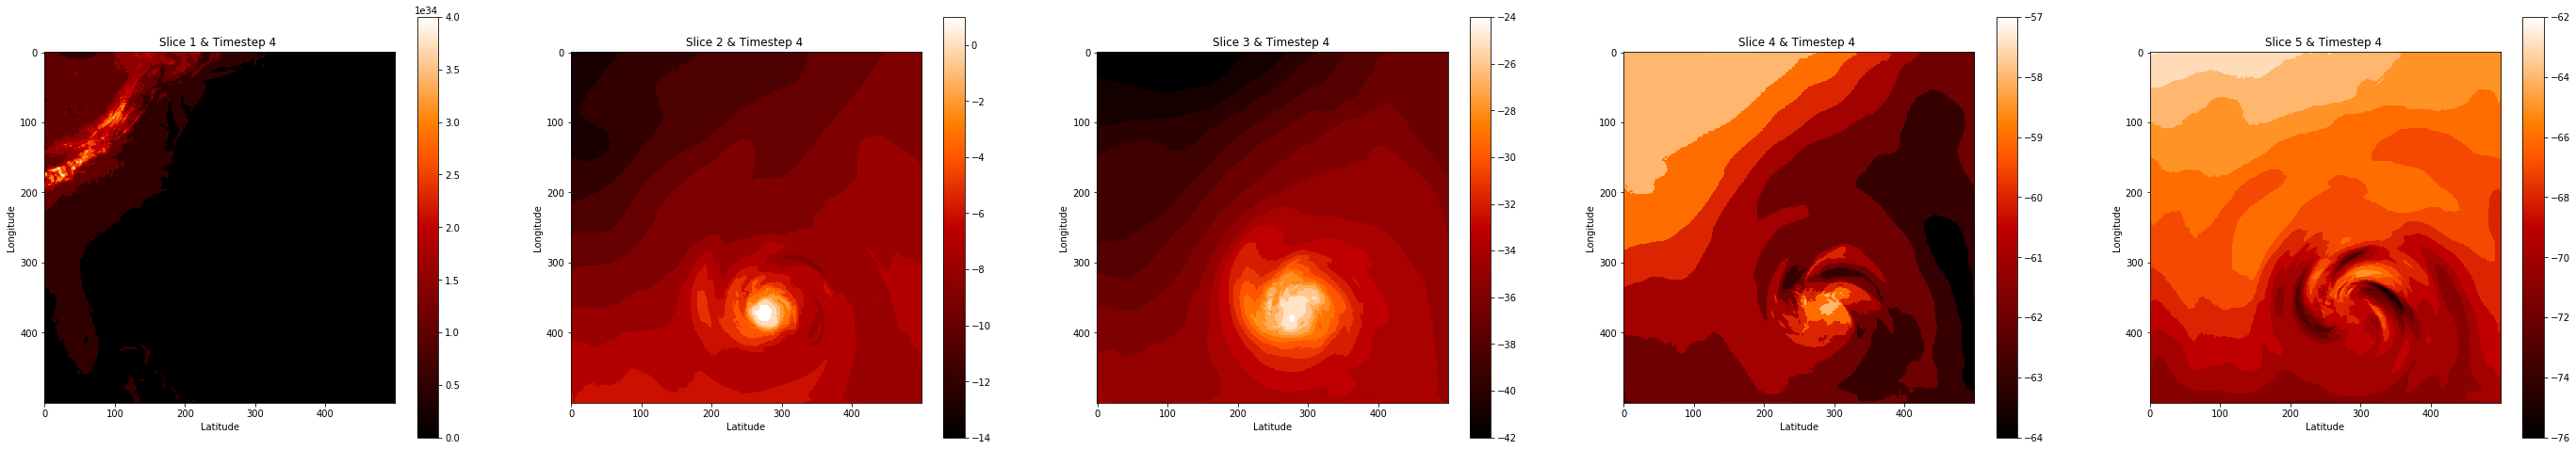

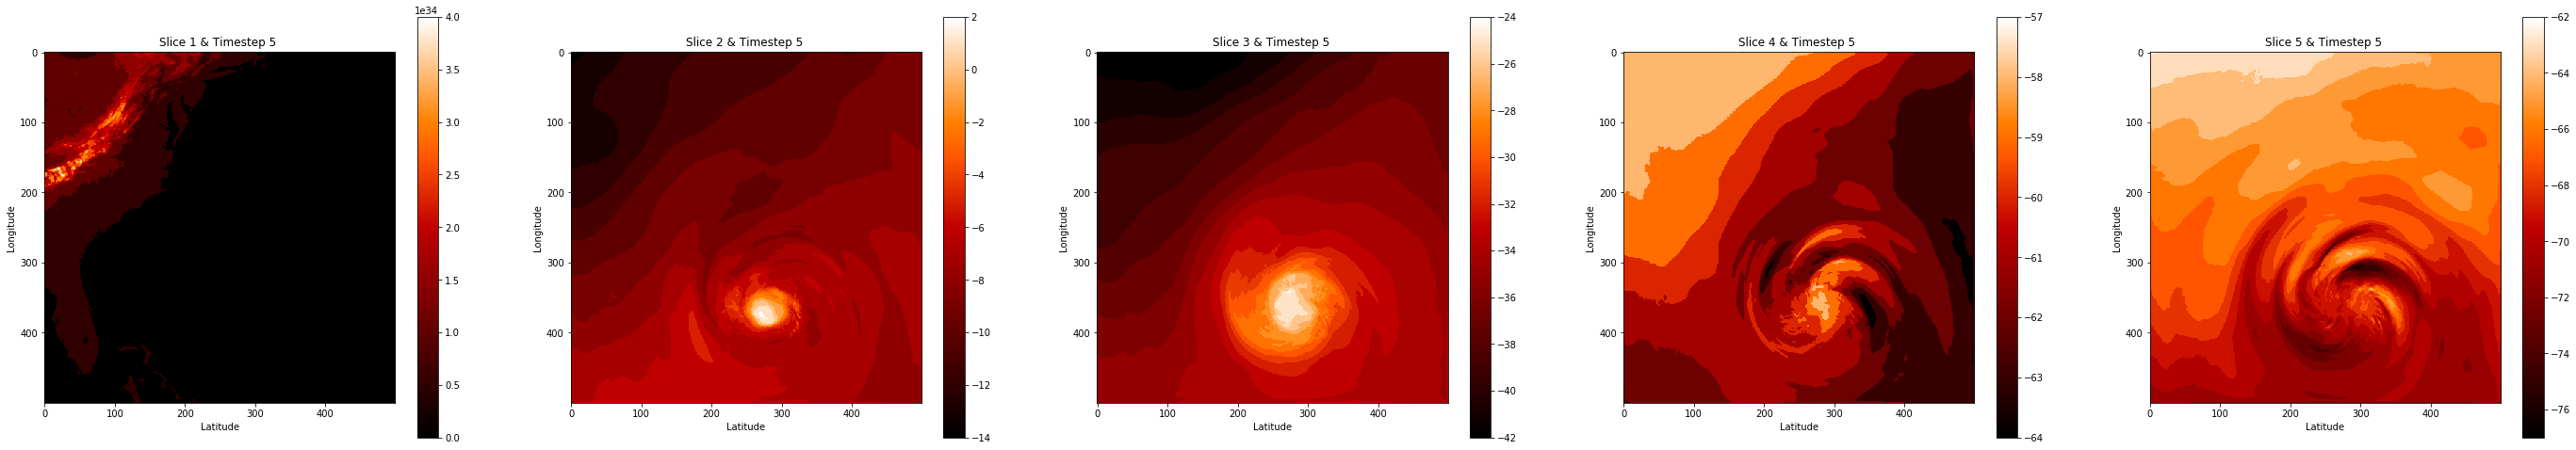

In [101]:
numFiles = 5
files = getFileNames(numFiles)
timestep = 1
n = 20
rows = 100//n
for i in files:
        with open(i,"rb") as f:
            arr = np.fromfile(f, dtype='>f')
            arr = np.reshape(arr, (500,500,100), order="F")
        data = slices(arr, n)
        fig=plt.figure(figsize=(20, 20))
        fig.subplots_adjust(bottom=0.2, right = 2, top = 2)
        for j in range(0, rows):
            fig.add_subplot(rows, 5, j+1)
            plt.imshow(data[j],cmap = cmap.gist_heat,vmin=data[j].min(),vmax=data[j].max())
            plt.title("Slice %s & Timestep %s "%(j+1, timestep))
            plt.xlabel("Latitude")
            plt.ylabel("Longitude")
            plt.colorbar()
        timestep += 1
